In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import glob
from specutils import Spectrum1D

*EL.fits: EL__FITS= 'Fitted Emission-Lines!'
*1D.fits: SPEC__1D= 'Spectra from FADO population synthesis' 
*ST.fits:  ST__FITS= 'Statistics & products!'
*DE.fits: 



In [2]:
files = glob.glob("*.fits")
for f in files:
    hdu = fits.open(f)
    head = hdu[0].header
    print("-"*20)
    print(f)
    print(hdu.info())
    print(list(head.keys())  )
    #print(repr(head))
    hdu.close()

--------------------
spec_wcs1d_p17q10_new_der.fits.output3_EL.fits
Filename: spec_wcs1d_p17q10_new_der.fits.output3_EL.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     101   (1071, 3)   float32   
None
['SIMPLE', 'BITPIX', 'NAXIS', 'NAXIS1', 'NAXIS2', 'EXTEND', 'COMMENT', 'FADO_VER', 'ODIE_VER', 'OBJ_TYPE', 'EL__FITS', 'ARQ_BASE', 'ARQ_CONF', 'ARQ_MASK', 'R_LAWOPT', 'NE_LINES', 'N_PARAMS', 'TOTLINES', 'ISNEBCON', 'ISNEBCPL', 'ISLEAKON', 'SELF_CON', 'CONVERGE', 'FLAG_BPT', 'ELAPSEDT', 'LAMBDA_0', 'GALSNORM', 'FLUXUNIT', 'LOGBN2HA', 'LOGBN2HA', 'ERRBN2HA', 'LOGBO3HB', 'ERRBO3HB', 'TELECTRO', 'DELECTRO', 'GEXTINCT', 'GEXTBDEV', 'GNEBULAR', 'GNEBBDEV', 'ORDERPAR', 'ORDERNUM', 'ROW_NUM1', 'ROW_NUM2', 'ROW_NUM3', 'BLOCK__1', 'BLOCK__2', 'BLOCK__3', 'EL_____1', 'EL_____2', 'EL_____3', 'EL_____4', 'EL_____5', 'EL_____6', 'EL_____7', 'EL_____8', 'EL_____9', 'EL____10', 'EL____11', 'EL____12', 'EL____13', 'EL____14', 'EL____15', 'EL____16', 

<class 'numpy.ndarray'>


(0, 10)

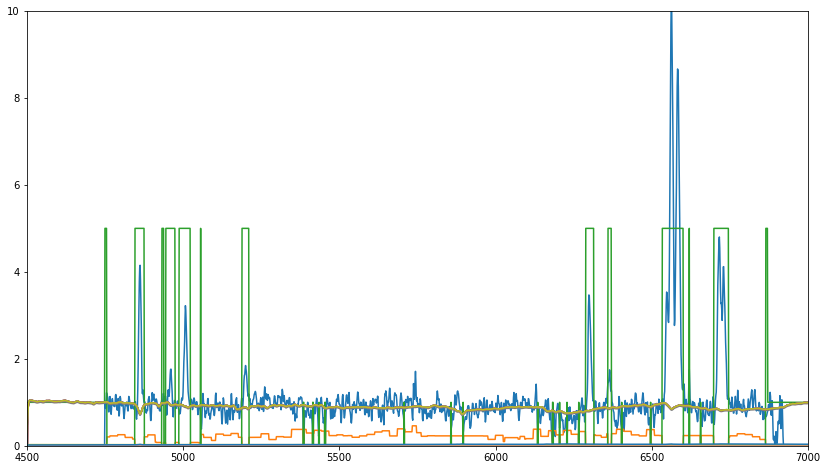

In [3]:
filename = "spec_wcs1d_p17q10_new_der.fits.output3_1D.fits"

oned_hdu = fits.open(filename)
data = oned_hdu[0].data
head = oned_hdu[0].header

CRVAL1 = head["CRVAL1"]
CRPIX1 = head["CRPIX1"] - 1 # because python
CRDELT1 = head["CDELT1"]

waves = CRVAL1 + CRDELT1*np.arange(0,data.shape[1],1)


plt.figure(figsize=(14,8))
for line in data:
    plt.plot(waves,line)
print(type(data[1]))
plt.xlim(4500,7000)
plt.ylim(0,10)

In [4]:
filename = "spec_wcs1d_p17q10_new_der.fits.output3_EL.fits"

oned_hdu = fits.open(filename)
data = oned_hdu[0].data
head = oned_hdu[0].header

from pyFADO import FADO
fado  = FADO("spec_wcs1d_p17q10_new_der.fits.output3_EL.fits",
             "spec_wcs1d_p17q10_new_der.fits.output3_ST.fits",
             "spec_wcs1d_p17q10_new_der.fits.output3_1D.fits",
             "spec_wcs1d_p17q10_new_der.fits.output3_DE.fits")

In [5]:
ELs = fado.ELnames()
print(ELs)


rows = fado.ELrows()
window = rows['Halpha'].split("--")
xmin = int(window[0])-1
xmax = int(window[1])-1
print(xmin,xmax)

{'[NeV]': 3425.5, '[OII]': 7330.2, 'H12': 3750.2, 'H11': 3770.6, 'H10': 3797.9, 'H9': 3835.4, '[NeIII]': 3967.8, 'H8HeI': 3889.0, 'Hepsilon': 3970.1, 'HeI': 7065.2, '[SII]': 6730.8, 'Hdelta': 4101.7, 'Hgamma': 4340.5, '[OIII]': 5006.8, '[FeIII]': 5270.4, 'HeII': 4685.7, '[ArIV]': 4740.2, 'Hbeta': 4861.3, '[FeVII]': 6086.3, '[NI]': 5199.1, '[ClIII]': 5519.2, '[NII]': 6583.5, '[OI]': 6363.8, '[SIII]': 6312.1, 'Halpha': 6562.8, '[ArIII]': 7751.1, '[FeII]': 8617.0}
840 860


In [29]:
values = data[:,xmin:xmax][0]
print(values)

#values[1].shape
for v in values:
    print(v)
print(6.5625151e+03  - 6.5627388e+03 )
print(6.5625151e+03  - 6.5625273e+03 )


[ 6.5625151e+03  9.4141359e+00  4.6416216e+00  4.1993923e+01
 -1.9711938e-03  1.0953178e+02  1.2930693e+02  6.5627388e+03
  9.4157734e+00  4.6428866e+00  3.1848013e+01 -2.6437384e-03
  1.0958069e+02  1.2951489e+02  6.5625273e+03  9.4160814e+00
  4.6425495e+00  4.1502628e+01 -3.0365945e-03  1.0957630e+02]
6562.515
9.414136
4.6416216
41.993923
-0.0019711938
109.53178
129.30693
6562.739
9.415773
4.6428866
31.848013
-0.0026437384
109.58069
129.5149
6562.5273
9.416081
4.6425495
41.50263
-0.0030365945
109.5763
-0.22370000000046275
-0.012200000000120781


In [25]:
results = fado.get_results("Halpha")
print(results)

{'Lambda': 6562.515, 'Amplitude': 9.414136, 'Sigma': 4.6416216, 'Vel': 41.993923, 'shift': -0.0019711938, 'Flux': 109.53178, 'EW': 129.30693}


Text(0.5, 1.0, 'Normal Gaussian Curve')

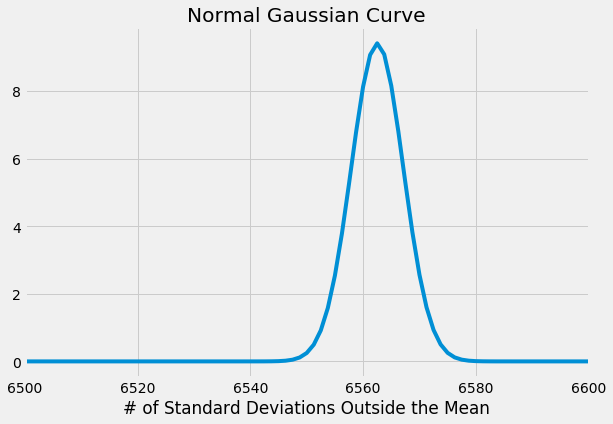

In [27]:
from scipy.stats import norm

mu = results["Lambda"] 
sigma = results["Sigma"]
amplitude = results["Flux"]
x = fado.waves()

# mean = 0, stddev = 1, since Z-transform was calculated
y = amplitude*norm.pdf(x,mu,sigma)


fig, ax = plt.subplots(figsize=(9,6))

ax.plot(x,y)



ax.set_xlim([6500,6600])
ax.set_xlabel('# of Standard Deviations Outside the Mean')

ax.set_title('Normal Gaussian Curve')


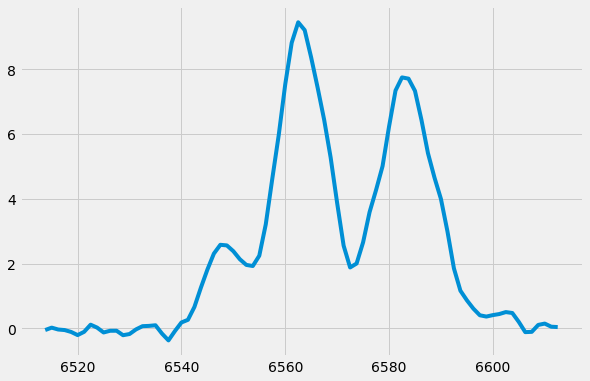

In [28]:
fig, ax = plt.subplots(figsize=(9,6))
fado.plot_line_residual("Halpha")

In [31]:
w = "5007.5"
w.split(".")[0]

'5007'